In [17]:
from datagenerator import DataGen
import numpy as np
import tensorflow as tf
import scipy as sc
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

tf.enable_eager_execution()

In [6]:
def chi_sq_dist(X):
    X_1 = tf.expand_dims(X, 1)
    X_2 = tf.expand_dims(X, 0)

    epsilon = tf.constant(0.000001)
    
    return 0.5 * tf.reduce_sum(tf.squared_difference(X_1, X_2) / (X_1+X_2 + epsilon), 2)

def chi_sq_nn(X):
    dist = chi_sq_dist(X)
    return np.argsort(np.abs(dist),axis=1)

In [3]:
#X, y = DataGen.gauss(100, 3)
#X, y = DataGen.moons(100,10)
X, y = DataGen.circle(100,0.1)
print(X.shape)
N = X.shape[0]
dims = X.shape[1]
K = 4

(100, 2)


In [7]:
knc = KNeighborsClassifier(n_neighbors=N,algorithm='brute')
knc.fit(X, y)

#dist, nearest_points = knc.kneighbors(X, N, return_distance= True)
#impostors = knc.kneighbors(X, N, return_distance= False)
nearest_points = chi_sq_nn(X.astype('float32'))


In [8]:
## Same Class Neighbors - Automatic v2.0
nn = np.zeros((N,K+1))
for i in range(N):
    tmp = nearest_points[i]
    idx = [elem for elem in tmp if elem in np.where(y==y[i])[0]]
    nn[i,:] = idx[:K+1]

In [9]:
## Opposite Class Neighbors - Automatic v2.0
im = np.zeros((N,K+1))
for i in range(N):
    tmp = nearest_points[i]
    idx = [elem for elem in tmp if elem in np.where(y!=y[i])[0]]
    im[i,:] = idx[:K+1]

0


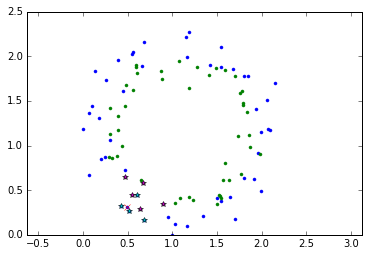

In [10]:
def plot_func(X,y):
    classes = np.unique(y)
    plt.axis('equal')
    for i in classes:
        plt.plot(X[y==i,0],X[y==i,1],'.')
    #plt.show()

t = 2
print(y[t])
plot_func(X,y)
plt.plot(X[int(nn[t,0]),0],X[int(nn[t,0]),1],'x')
plt.plot(X[nn[t,1:].astype(np.int),0],X[nn[t,1:].astype(np.int),1],'*')
plt.plot(X[im[t,:].astype(np.int),0],X[im[t,:].astype(np.int),1],'*')
plt.show()


In [23]:
A = np.eye(N) + 0.01* np.ones((N,N))
L = tf.nn.softmax(A,axis=0)



In [40]:
i = 1
j = 2
q = 0
p = 0
A = np.eye(2) + 0.01*np.ones((2,2))
L = tf.nn.softmax(A,axis=0)

xbar = L @ X


tijp = (xbar[i,p] - xbar[j,p]) / (xbar[i,p] - xbar[j,p])
tempsum = 0
for l in range(r):
    tijl = (xbar[i,l] - xbar[j,l]) / (xbar[i,l] - xbar[j,l])
    tempsum += L[l,q]*(tijl*(X[i,q] - X[j,q]) - tijl*tijl*(X[i,q] + X[j,q])/2 )
    
dCijqp = L[q,p]*( tijp*(X[i,q] - X[j,q]) - tijp*tijp*(X[i,q]+X[j,q])/2 ) - tempsum

InvalidArgumentError: Matrix size-incompatible: In[0]: [2,2], In[1]: [100,2] [Op:MatMul] name: matmul/

In [49]:
wtf = L @ np.asarray(X).T

<tf.Tensor: id=336, shape=(2, 100), dtype=float64, numpy=
array([[1.18791127, 1.30834811, 0.44020902, 1.37982368, 1.68827717,
        1.6618579 , 0.81070595, 0.74902455, 1.13256339, 1.58739523,
        1.63455958, 1.38995312, 0.64496808, 0.44560822, 2.02629541,
        0.99228199, 0.73284837, 0.84475219, 0.85107218, 1.65599924,
        1.30804498, 1.6988241 , 0.87799051, 0.72613272, 1.23476277,
        1.28851238, 1.82487118, 1.71362377, 1.5882432 , 1.43668385,
        1.1114366 , 0.22716015, 0.52557251, 0.94879152, 1.47565721,
        0.79035728, 1.63816184, 0.56193443, 0.51727074, 0.46547239,
        1.24091883, 1.20556986, 1.5141785 , 0.54802127, 0.54648409,
        0.98007474, 1.79461853, 1.69618968, 0.59960175, 0.59939353,
        1.47782718, 1.7655701 , 1.70942627, 1.79550265, 0.53550774,
        1.72778874, 0.90758804, 1.72412119, 1.31659464, 1.24515464,
        0.44646163, 0.59527393, 1.35897142, 1.67830578, 1.55108744,
        0.64275474, 1.07869813, 0.64478262, 0.96398459, 0.

In [38]:
xbar[0,0]

<tf.Tensor: id=300, shape=(), dtype=float64, numpy=1.0901506926524922>

In [35]:
r

100

In [ ]:
X = tf.contrib.eager.Variable(X, dtype=tf.float32)

target_neighbours = tf.zeros((N, K)) #TODO!
impostors = tf.zeros((N, K)) #TODO!

A = 10 * tf.eye(dims) + 0.01 * tf.ones((dims,dims))
# If we do softmax, then according to Yang, A=10*tf.eye(dims) - 5*tf.ones((dims,dims))
L = tf.softmax(A, axis=0)

chi_dist = chi_sq_dist(L @ X)


In [ ]:
from sklearn.metrics.pairwise import additive_chi2_kernel

In [ ]:
additive_chi2_kernel(X)

In [ ]:

with tf.GradientTape() as tape:
    loss = -0.5 * additive_chi2_kernel(X)

tape.gradient(loss, X)

In [ ]:
tf.matmul(X,y)